<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/01_Classification_and_Regression_Trees(CART).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>Classification and Regression Trees(CART)</h1> 
</strong>

---


```python
from sklearn.tree import DecisionTreeClassifier # Classifier
from sklearn.tree import DecisionTreeRegressor  # Regressor
```

Classification and Regression Trees (CART) are a set of **supervised learning models** used for problems involving classification and regression.

__Decision Tree__: 

Data structure consisting of a hierarchy of nodes

- __Node__: question or prediction
    - __Root__: no parent node, question giving rise to two children nodes.
    - __Internal node__: one parent node, question giving rise to two children nodes.
    - __Leaf__: one parent node, no children nodes –> prediction.


# __Classification Tree__
---
- Sequence of if-else questions about individual features, and learns patterns from the features in such a way to produce the purest leafs.
    - In the end, in each leaf, one class-label is predominant.
- __Objective:__ infer class labels
- Able to capture non-linear relationships between features and labels
- Don’t require __feature scaling__ (e.g. **Standardization**, ..)
Decision Regions.

__Decision region:__
---
- __Decision region:__ Region in the feature space where all instances are assigned to one class label.
- __Decision Boundary:__ surface separating different decision regions.
    - Linear boundary
    - Non-linear boundary

<p align='center'>
  <a href="#">
    <img src='https://www.jeremyjordan.me/content/images/2017/03/Screen-Shot-2017-03-11-at-10.15.37-PM.png' width=600 height=400 alt="">
  </a>
</p>


**Decision Tree** is the most powerful and popular tool for **classification** and **prediction**. A Decision tree is a **flowchart like tree structure**, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

**Construction of Decision Tree :**

A tree learned by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called **recursive partitioning**. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions.

- The construction of decision tree classifier does not require any domain knowledge or parameter setting, and therefore is appropriate for exploratory knowledge discovery.
- Decision trees can handle high dimensional data. 
- In general decision tree classifier has good accuracy. Decision tree induction is a typical inductive approach to learn knowledge on classification.

- **Classification-tree**
    - Sequence of `if-else` questions about individual features.
    - **Objective**: infer class labels
    - Able to caputre non-linear relationships between features and labels
    - Don't require feature scaling(e.g. `Standardization`)

<p align='center'>
  <a href="#">
    <img src='https://naivedatascientist.files.wordpress.com/2020/09/decision-tree_1.png?w=740' width=600 height=400 alt="">
  </a>
</p>

### *Train your first classification tree*

In this exercise you'll work with the [Wisconsin Breast Cancer Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (```radius_mean```) and its mean number of concave points (```concave points_mean```).

__Clone the Repository__

In [1]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (251/251), done.
remote: Compressing objects: 100% (229/229), done.
remote: Total 2437 (delta 70), reused 172 (delta 21), pack-reused 2186
Receiving objects: 100% (2437/2437), 298.18 MiB | 15.23 MiB/s, done.
Resolving deltas: 100% (848/848), done.
Checking out files: 100% (1045/1045), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')
#sns.set_theme(style='whitegrid')
%matplotlib inline

In [3]:
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/28_Machine-Learning-with-Tree-Based-Models-in-Python/_dataset')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/CAREER-TRACK-Data-Scientist-with-Python/28_Machine-Learning-with-Tree-Based-Models-in-Python/_dataset


In [4]:
ls

auto.csv   indian_liver_patient.csv               wbc.csv
bikes.csv  indian_liver_patient_preprocessed.csv


### Preprocess

In [5]:
wbc = pd.read_csv('wbc.csv')
wbc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
wbc.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
wbc.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis'].map({'M':1, 'B':0})

### Train: classification tree

The dataset is split into 80% train and 20% test & the feature matrices are assigned to `X_train` and `X_test`, while the arrays of labels are assigned to `y_train` and `y_test` where class-1 corresponds to a __malignant tumor__ and **class-0** corresponds to a **benign tumor**. To obtain reproducible results, we also defined a variable called SEED which is set to 1.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=1)

`stratify` parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, `stratify=y` will make sure that your random split has 25% of 0's and 75% of 1's

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


### **Evaluate the classification tree**
Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

In [11]:
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


Only two features, your tree was able to achieve an accuracy of 89%!

---

```python
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis'].map({'M':1, 'B':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=1)


# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
                                  
```
---

### Logistic regression vs classification tree

A **classification tree** divides the feature space into **rectangular regions**. In contrast, a **linear model** such as **logistic regression** produces only a ***single linear decision boundary dividing the feature space into two decision regions***.

__Helper function__

In [12]:
from mlxtend.plotting import plot_decision_regions

def plot_labeled_decision_regions(X, y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


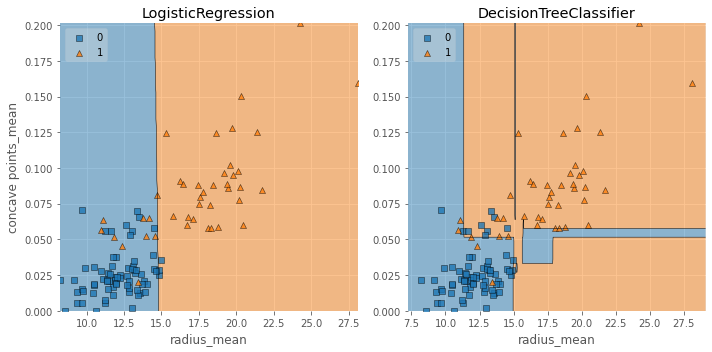

In [13]:
from sklearn.linear_model import LogisticRegression

# Instantiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifier
plot_labeled_decision_regions(X_test, y_test, clfs)

The decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

### __Information Gain (IG)__

- The nodes of a classification tree are grown **recursively**: the obtention of an internal node or a leaf depends on the state of its predecessors.

- To produce the purest leaves possible, at each node, a tree asks a question involving **one feature** ${f}$ and a **split-point** sp.

- ***But how does it know which feature and which split-point to pick?*** It does so by maximizing information gain, i.e. maxmize ${IG}\text{(node)}$

    - __If it is a unconstrained tree__ and the ${IG}\text{(node)} = 0$, ***declare the node a leaf***.

    - __If it is a constrained tree__, like the `max_depth` was set to `2`, then it will stop at the set depth no matter the value of the ${IG}\text{(node)}$.


The tree considers that every node contains information and aims at maximizing the information gain obtained after each split.

$$ IG(\underbrace{f}_{\text{feature}}, \underbrace{sp}_{\text{split-point}} ) = I(\text{parent}) - \big( \frac{N_{\text{left}}}{N}I(\text{left}) + \frac{N_{\text{right}}}{N}I(\text{right})  \big) $$

- Criteria to measure the impurity of a note $I(\text{node})$:
    - gini index
    - entropy
    - etc...

---
>$\color{red}{\textbf{NOTE:}}$ When an **internal node is split**, the split is performed in such a way so that **information gain is minimized**.
---

### **Criterion** $\Rightarrow$ **Entropy** vs **Gini index**

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Instantiate dt_entropy, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy
print("Accuracy achieved by using entropy: ", accuracy_entropy)
print("Accuracy achieved by using gini: ", accuracy_gini)

Accuracy achieved by using entropy:  0.8859649122807017
Accuracy achieved by using gini:  0.9210526315789473


>Notice how the two models achieve exactly the same accuracy. Most of the time, the gini index and entropy lead to the same results. **The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.**

# __Regression Tree__

- Information Criterion for Regression Tree
$$ I(\text{node}) = \underbrace{\text{MSE}(\text{node})}_{\text{mean-squared-error}} = \dfrac{1}{N_{\text{node}}} \sum_{i \in \text{node}} \big(y^{(i)} - \hat{y}_{\text{node}}  \big)^2 $$
$$ \underbrace{\hat{y}_{\text{node}}}_{\text{mean-target-value}} = \dfrac{1}{N_{\text{node}}} \sum_{i \in \text{node}}y^{(i)}$$
- Prediction
$$ \hat{y}_{\text{pred}}(\text{leaf}) = \dfrac{1}{N_{\text{leaf}}} \sum_{i \in \text{leaf}} y^{(i)}$$

### *Train your first regression tree*
In this exercise, you'll train a regression tree to predict the mpg (miles per gallon) consumption of cars in the [auto-mpg dataset](https://www.kaggle.com/uciml/autompg-dataset) using all the six available features.



#### Preprocess

In [15]:
mpg = pd.read_csv('auto.csv')
mpg.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [16]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


In [17]:
mpg['origin'].value_counts()

US        245
Asia       79
Europe     68
Name: origin, dtype: int64

In [18]:
mpg = pd.get_dummies(mpg) # Converts categorical data into indicator variables(Automatically)

In [19]:
mpg.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [20]:
X = mpg.drop('mpg', axis='columns')
y = mpg['mpg']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=3)

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, 
                           min_samples_leaf=0.13,
                           random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

`min_samples_split` specifies the minimum number of samples required to split an internal node, while `min_samples_leaf` specifies the minimum number of samples required to be at a leaf node. For instance, if `min_samples_split = 5`, and there are `7` samples at an internal node, then the **split is allowed**.

if `min_samples_split = 0.13` each leaf has to contain at least `13%` of the training data.

### Evaluate the regression tree
In this exercise, you will evaluate the test set performance of ```dt``` using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).



In [23]:
from sklearn.metrics import mean_squared_error

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = mean_squared_error(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**0.5

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.37


### ERROR
```
Error: continuous is not supported 
```
$\color{red}{\textbf{NOTE:}}$  **Accuracy_score** is for **classification tasks** only. For **regression** we should use something different, for example:

`clf.score(X_test, y_test)`

Where `X_test` is samples, `y_test` is corresponding ground truth values. It will compute predictions inside.

## **Linear regression vs regression tree**
In this exercise, you'll compare the test set RMSE of ```dt``` to that achieved by a linear regression model. We have already instantiated a linear regression model ```lr``` and trained it on the same dataset as ```dt```.



#### Preprocess

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

>Here, it's important to note that, when a **regression tree** is trained on a dataset, the impurity of a node is measured using the `mean-squared error` of the targets in that node. This means that the **regression tree** tries to find the splits that produce leafs where in each leaf the target values are on average, the closest possible to the **mean-value** of the labels in that particular leaf.


In [25]:
# Predict test set labels
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** 0.5

# Print rmse_lr
print("Linear Regression test set RMSE: {:.2f}".format(rmse_lr))

# Print rmse_dt
print("Regression Tree test set RMSE: {:.2f}".format(rmse_dt))

Linear Regression test set RMSE: 5.10
Regression Tree test set RMSE: 4.37


---
```python
# Import
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import accuracy_score

# subsetting the features and Target varible
X = mpg.drop('mpg', axis='columns')
y = mpg['mpg']

# Spliting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=3)

# Instantiate Decision Tree------------------------------------------
dt = DecisionTreeRegressor(max_depth=8, 
                           min_samples_leaf=0.13,
                           random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = mean_squared_error(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**0.5

# Instantiate Linear Regressor----------------------------------------
lr = LinearRegression()

# Fit dt to the training set
lr.fit(X_train, y_train)

# Predict test set labels
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** 0.5

# Print rmse_lr
print("Linear Regression test set RMSE: {:.2f}".format(rmse_lr))

# Print rmse_dt
print("Regression Tree test set RMSE: {:.2f}".format(rmse_dt))

# Linear Regression test set RMSE: 5.10
# Regression Tree test set RMSE: 4.37
```
---




<p align='center'> 
    <a href="https://twitter.com/F4izy"> 
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px 
            height=50px> 
    </a> 
    <a href="https://www.linkedin.com/in/mohd-faizy/"> 
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px> 
    </a> 
</p>